#📌 Extracción

In [44]:
import pandas as pd
datos = pd.read_json("TelecomX_Data.json")
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [46]:

datos_normalize = pd.json_normalize(datos.to_dict(orient="records"))

datos_normalize.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [47]:
datos_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [48]:
datos_normalize.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [49]:
datos_normalize.duplicated().sum()

np.int64(0)

In [50]:
datos_normalize["customerID"].duplicated().sum()

np.int64(0)

In [51]:
for col in datos_normalize.select_dtypes(include="object"):
    print(col, datos_normalize[col].unique())


customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes' '']
customer.gender ['Female' 'Male']
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
phone.PhoneService ['Yes' 'No']
phone.MultipleLines ['No' 'Yes' 'No phone service']
internet.InternetService ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity ['No' 'Yes' 'No internet service']
internet.OnlineBackup ['Yes' 'No' 'No internet service']
internet.DeviceProtection ['No' 'Yes' 'No internet service']
internet.TechSupport ['Yes' 'No' 'No internet service']
internet.StreamingTV ['Yes' 'No' 'No internet service']
internet.StreamingMovies ['No' 'Yes' 'No internet service']
account.Contract ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling ['Yes' 'No']
account.PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


Detecto inconsistencia en Campo "Churn" tiene 3 valores No , Yes y " "

El churn (o churn rate) es la tasa de cancelación o rotación de clientes, indicando el porcentaje de suscriptores que dejan de usar un producto o servicio durante un periodo determinado. Es una métrica vital en negocios de suscripción

Es vital para el analisis asi que decido eliminarlos ya qu son pocos

In [52]:
datos_normalize["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [53]:
datos_normalize = datos_normalize[datos_normalize["Churn"] != ""]
datos_normalize["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [54]:
datos_normalize = datos_normalize.apply(
    lambda x: x.str.strip() if x.dtype == "object" else x
)

datos_normalize.replace("No internet service", "No", inplace=True)
datos_normalize.replace("No phone service", "No", inplace=True)


In [55]:
datos_normalize["account.Charges.Total"] = pd.to_numeric(
    datos_normalize["account.Charges.Total"],
    errors="coerce"
)


In [56]:
datos_normalize.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [57]:
datos_normalize["Churn"] = datos_normalize["Churn"].map({
    "Yes": 1,
    "No": 0
})

In [58]:
datos_normalize.rename(columns={
    "Churn": "Abandono",
    "customer.tenure": "MesesContrato"
}, inplace=True)


In [59]:
datos_normalize["account.Charges.Total"].isnull().sum()


np.int64(11)

11 clientes con Charges total NAN

Se debe a que tienen MesesContrato = 0


In [60]:
datos_normalize[datos_normalize["account.Charges.Total"].isnull()]


,customerID,Abandono,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,MesesContrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,0,Female,0,Yes,Yes,0,No,No,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,0,Female,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,0,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,0,Male,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,0,Male,0,No,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,0,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,0,Female,0,Yes,Yes,0,No,No,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,0,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [61]:
datos_normalize["account.Charges.Total"].fillna(0, inplace=True)


/tmp/ipython-input-704063148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_normalize["account.Charges.Total"].fillna(0, inplace=True)


In [62]:
datos_normalize["account.Charges.Total"].isnull().sum()


np.int64(0)

#📊 Carga y análisis

Meses de Contrato

Promedio: 32 meses

Rango: 0 a 72 meses

Alta variabilidad (std ≈ 24.5)

 La empresa tiene tanto clientes nuevos como clientes muy antiguos.
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Cargos Mensuales

Promedio: 64.76

Rango: 18.25 a 118.75

 Existen distintos niveles de planes, desde básicos hasta más costosos.
 ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

  Cargos Totales

Promedio: 2279.73

Rango: 0 a 8684.80

Alta dispersión (std ≈ 2266)

 El gasto acumulado varía mucho, lo cual es lógico porque depende del tiempo que el cliente haya permanecido en la empresa

In [64]:
datos_normalize[[
    "MesesContrato",
    "account.Charges.Monthly",
    "account.Charges.Total"
]].describe()


,MesesContrato,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [65]:
datos_normalize["Abandono"].value_counts()


,count
Abandono,
0,5174
1,1869


In [66]:
datos_normalize["Abandono"].value_counts(normalize=True)


,proportion
Abandono,
0,0.73463
1,0.26537


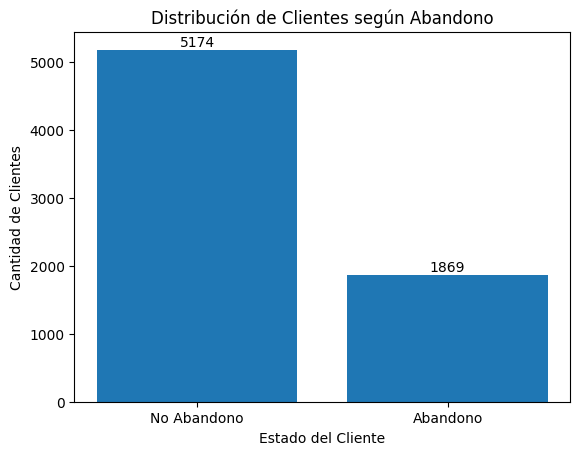

In [78]:
import matplotlib.pyplot as plt

Abandono_counts = datos_normalize["Abandono"].value_counts()

plt.figure()

bars = plt.bar(
    ["No Abandono", "Abandono"],
    Abandono_counts
)


plt.title("Distribución de Clientes según Abandono")
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad de Clientes")

for i, value in enumerate(Abandono_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


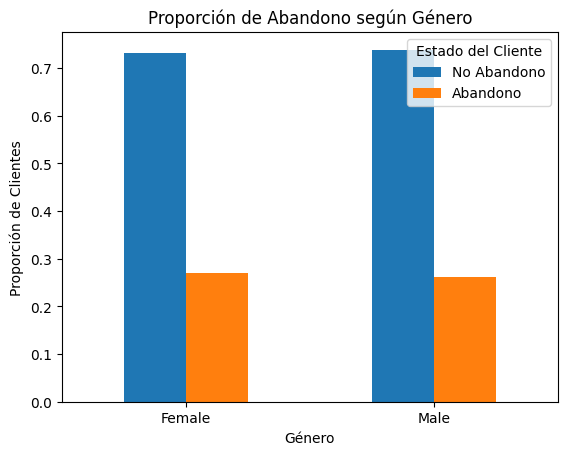

In [88]:
tabla_genero = pd.crosstab(
    datos_normalize["customer.gender"],
    datos_normalize["Abandono"],
    normalize="index"
)


tabla_genero.columns = ["No Abandono", "Abandono"]

tabla_genero.plot(kind="bar")

plt.title("Proporción de Abandono según Género")
plt.xlabel("Género")
plt.ylabel("Proporción de Clientes")
plt.xticks(rotation=0)
plt.legend(title="Estado del Cliente")
plt.show()


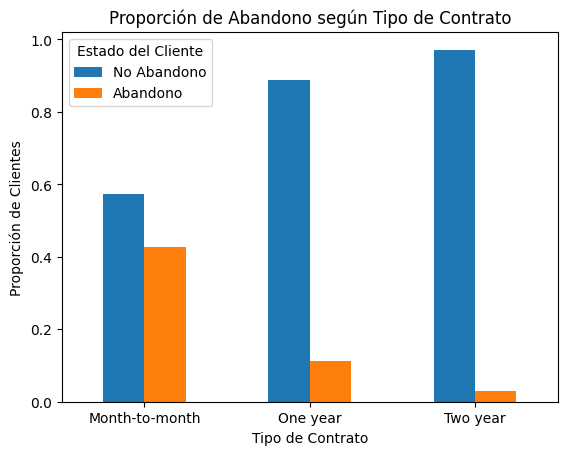

In [85]:
tabla_contrato = pd.crosstab(
    datos_normalize["account.Contract"],
    datos_normalize["Abandono"],
    normalize="index"
)

tabla_contrato.columns = ["No Abandono", "Abandono"]

tabla_contrato.plot(kind="bar")

plt.title("Proporción de Abandono según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Proporción de Clientes")
plt.xticks(rotation=0)
plt.legend(title="Estado del Cliente")
plt.show()


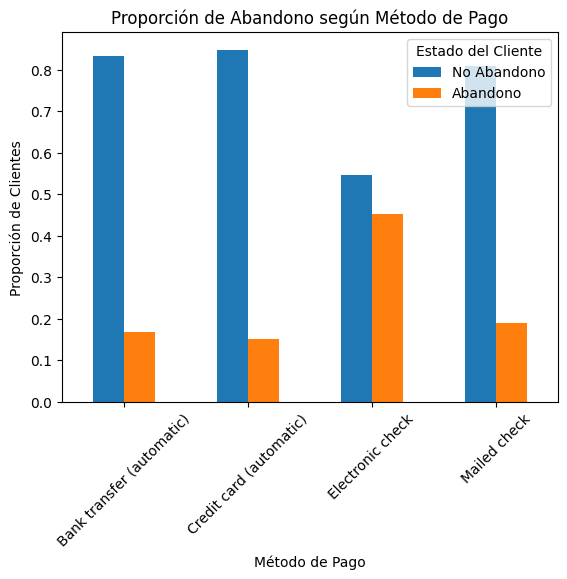

In [87]:
tabla_pago = pd.crosstab(
    datos_normalize["account.PaymentMethod"],
    datos_normalize["Abandono"],
    normalize="index"
)

# Cambiar nombres de columnas para la leyenda
tabla_pago.columns = ["No Abandono", "Abandono"]

tabla_pago.plot(kind="bar")

plt.title("Proporción de Abandono según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Proporción de Clientes")
plt.xticks(rotation=45)
plt.legend(title="Estado del Cliente")
plt.show()


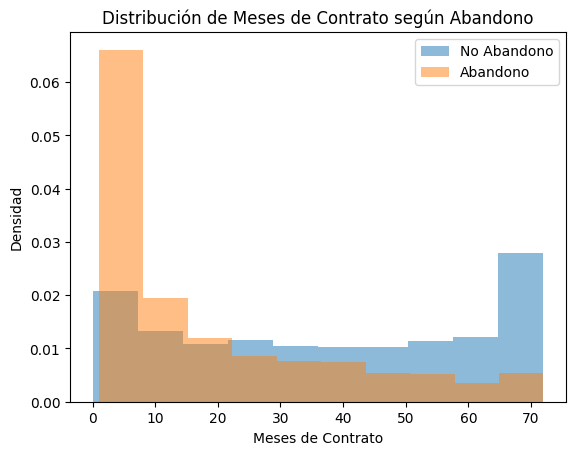

In [89]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 0]["MesesContrato"],
    alpha=0.5,
    label="No Abandono",
    density=True
)

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 1]["MesesContrato"],
    alpha=0.5,
    label="Abandono",
    density=True
)

plt.title("Distribución de Meses de Contrato según Abandono")
plt.xlabel("Meses de Contrato")
plt.ylabel("Densidad")
plt.legend()
plt.show()


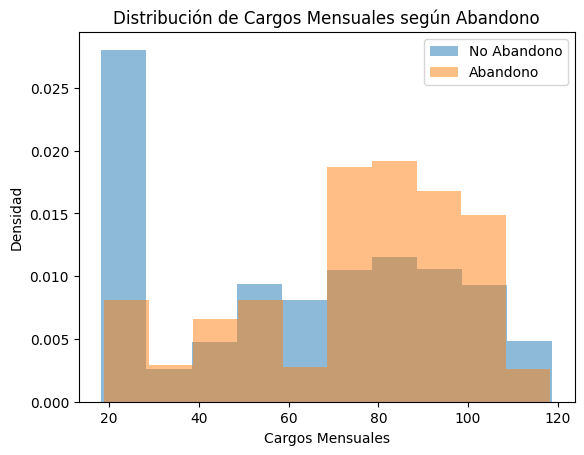

In [90]:
plt.figure()

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 0]["account.Charges.Monthly"],
    alpha=0.5,
    label="No Abandono",
    density=True
)

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 1]["account.Charges.Monthly"],
    alpha=0.5,
    label="Abandono",
    density=True
)

plt.title("Distribución de Cargos Mensuales según Abandono")
plt.xlabel("Cargos Mensuales")
plt.ylabel("Densidad")
plt.legend()
plt.show()


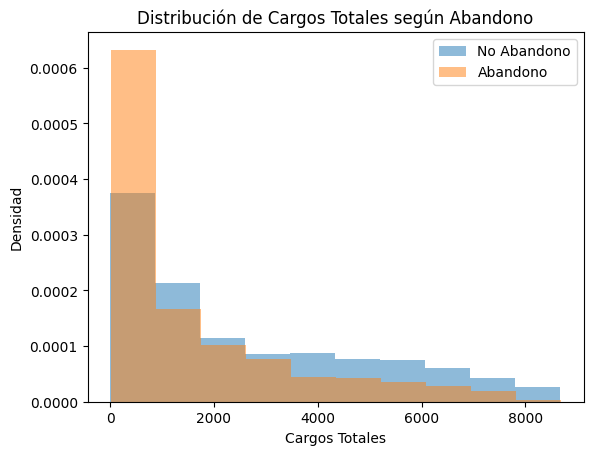

In [91]:
plt.figure()

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 0]["account.Charges.Total"],
    alpha=0.5,
    label="No Abandono",
    density=True
)

plt.hist(
    datos_normalize[datos_normalize["Abandono"] == 1]["account.Charges.Total"],
    alpha=0.5,
    label="Abandono",
    density=True
)

plt.title("Distribución de Cargos Totales según Abandono")
plt.xlabel("Cargos Totales")
plt.ylabel("Densidad")
plt.legend()
plt.show()


#📄Informe final

# Análisis de Evasión de Clientes

## 1. Introducción

El presente análisis tiene como objetivo estudiar el fenómeno de evasión de clientes (Abandono / Churn) en la empresa, identificando patrones y factores que influyen en la cancelación del servicio.

La evasión representa una problemática crítica porque impacta directamente en:

- Ingresos recurrentes
- Estabilidad financiera
- Crecimiento sostenible del negocio

Comprender qué perfiles presentan mayor probabilidad de abandono permite diseñar estrategias de retención basadas en datos, optimizando recursos y mejorando la rentabilidad.

---

## 2. Limpieza y Tratamiento de Datos

Durante la fase de preparación se realizaron los siguientes procesos:

- Importación del dataset.
- Verificación de registros duplicados (no se encontraron duplicados).
- Identificación de valores faltantes en la variable **Cargos Totales** (11 registros).
- Análisis de estos casos, detectando que correspondían a clientes con 0 meses de contrato.
- Reemplazo de valores nulos por 0, manteniendo coherencia lógica.
- Normalización y estandarización de nombres de columnas.

Resultado final:

El dataset quedó conformado por **7043 registros completos**, listo para el análisis exploratorio.

---

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución General de Abandono

Proporción de clientes:

- No abandonan: **73.46%**
- Abandonan: **26.53%**

Esto indica que aproximadamente 1 de cada 4 clientes cancela el servicio, lo que representa un nivel significativo de evasión.

---

### 3.2 Análisis de Variables Numéricas

#### Meses de Contrato

- Promedio: **32 meses**
- Desviación estándar: ≈ 24.5
- Rango: 0 – 72 meses

Hallazgo clave:

Los clientes que abandonan se concentran principalmente en los primeros 20 meses, lo que sugiere que el riesgo de evasión es mayor en etapas tempranas del ciclo de vida del cliente.

---

#### Cargos Mensuales

- Promedio: **64.76**
- Rango: 18.25 – 118.75

Hallazgo clave:

Se observa mayor abandono en el rango de 70 a 110 unidades monetarias, lo que podría indicar sensibilidad al precio en planes más costosos.

---

#### Cargos Totales

- Promedio: **2279.73**
- Alta variabilidad

Hallazgo clave:

Los clientes que abandonan tienden a presentar menor gasto acumulado, reforzando la idea de que cancelan antes de generar alto valor para la empresa.

---

### 3.3 Análisis por Variables Categóricas

#### Género

La proporción de abandono es similar entre hombres y mujeres.

Conclusión:  
El género no es un factor determinante en la evasión.

---

#### Tipo de Contrato

- Month-to-Month: Mayor tasa de abandono (aprox. 60%-40%)
- One Year: Alta retención
- Two Year: Muy alta retención

Insight clave:

Los contratos mensuales presentan mayor riesgo de abandono.  
Los contratos de largo plazo generan mayor estabilidad y fidelización.

---

#### Método de Pago

- Bank Transfer: Alta retención
- Credit Card: Alta retención
- Mailed Check: Alta retención
- Electronic Check: Mayor proporción de abandono (55%-45%)

Posibles interpretaciones:

- Menor compromiso del cliente
- Mayor sensibilidad al precio
- Fricción en el método de pago

---

## 4. Conclusiones e Insights

- La evasión afecta al **26.53%** de los clientes.
- El mayor riesgo se encuentra en los primeros 20 meses.
- Los contratos mensuales presentan la tasa más alta de abandono.
- Los clientes con cargos mensuales más elevados muestran mayor probabilidad de cancelar.
- El método de pago Electronic Check está asociado a mayor evasión.
- El género no influye significativamente.
- El abandono está más relacionado con comportamiento contractual y financiero que con variables demográficas básicas.

---

## 5. Recomendaciones Estratégicas

### 1. Incentivar contratos de largo plazo

Ofrecer descuentos o beneficios adicionales para migrar clientes de contrato mensual a contratos de 1 o 2 años.

### 2. Estrategia de retención temprana

Implementar campañas de seguimiento en los primeros 6 a 12 meses del cliente, donde el riesgo es mayor.

### 3. Revisión de planes de alto costo

Analizar la percepción de valor en planes entre 70 y 110 unidades monetarias para reducir cancelaciones.

### 4. Analizar método Electronic Check

Evaluar si existe fricción en el proceso de pago e incentivar migración a tarjeta o transferencia bancaria.

### 5. Implementar modelo predictivo

Desarrollar un modelo de Machine Learning para anticipar el abandono y aplicar estrategias preventivas.

---

## Conclusión Final

El análisis demuestra que la evasión no ocurre de manera aleatoria, sino que está fuertemente asociada al:

- Tipo de contrato
- Antigüedad del cliente
- Método de pago

La empresa puede reducir significativamente la pérdida de clientes si enfoca sus estrategias en:

- Retención temprana
- Migración a contratos largos
- Optimización de planes y métodos de pago
